In [1]:
!pip install kmodes
from kmodes.kmodes import KModes
import matplotlib.pyplot as plt
import pandas as pd


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
import requests

from bs4 import BeautifulSoup
resp = requests.get("https://www.imdb.com/showtimes/location/US/10003")
 



soup = BeautifulSoup(resp.text)


movies = soup.find("div", {'class':'lister-list'})




titles = []
for movie in movies.find_all('div', {'class': 'title'}):
  titles.append(movie.text)


genres = []
for movie in movies.find_all('span',{'class': 'genre'}):
  genres.append(movie.text.strip())

ratings = []
for movie in movies.find_all('div',{'class':'lister-item mode-grid'}):
  if movie.find('div',{'class':'inline-block ratings-imdb-rating'})== None:
    ratings.append('N/A')
  else:
    ratings.append(movie.find('div',{'class':'inline-block ratings-imdb-rating'}).text.strip())

descriptions= []
for movie in movies.find_all('p',{'class':''}):
  descriptions.append(movie.text.strip())

runtimes = []
for movie in movies.find_all('span',{'class': 'runtime'}):
  runtimes.append(movie.text.strip())

MPAA_ratings = []

for movie in movies.find_all('div',{'class': 'lister-item mode-grid'}):
  section = movie.find('p',{'class':"text-muted text-small"})
  if section.find('span',{'class':'certificate'}) == None:
    MPAA_ratings.append('N/A')
  else:
    MPAA_ratings.append(section.find('span',{'class':'certificate'}).text.strip())




In [ ]:
#runtimes.append(None)
print (len(titles))
print(len(genres))
print(len(ratings))
print(len(MPAA_ratings))
print(len(runtimes))
print(len(descriptions))

#movie_df = pd.DataFrame({'Movie':titles, 'Genre': genres, 'Rating': ratings, 'MPAA rating':MPAA_ratings, 'Runtime': runtimes, 'Description': descriptions})
#movie_df


63
63
63
63
63
63


In [4]:
movie_df = pd.DataFrame({'Movie':titles, 'Genre': genres, 'Rating': ratings, 'MPAA rating':MPAA_ratings, 'Runtime': runtimes, 'Description': descriptions})
movie_df




,Movie,Genre,Rating,MPAA rating,Runtime,Description
0,Avatar: The Way of Water,"Action, Adventure, Fantasy",7.9,PG-13,192 min,Jake Sully lives with his newfound family form...
1,Babylon,"Comedy, Drama, History",7.4,R,189 min,A tale of outsized ambition and outrageous exc...
2,The Banshees of Inisherin,"Comedy, Drama",7.9,R,114 min,Two lifelong friends find themselves at an imp...
3,Roald Dahl's Matilda the Musical,"Comedy, Drama, Family",7.2,PG,117 min,An adaptation of the Tony and Olivier award-wi...
4,Violent Night,"Action, Comedy, Crime",6.8,R,112 min,When a group of mercenaries attack the estate ...
5,Top Gun: Maverick,"Action, Drama",8.4,PG-13,130 min,"After thirty years, Maverick is still pushing ..."
6,Strange World,"Animation, Action, Adventure",5.5,PG,102 min,The legendary Clades are a family of explorers...
7,Guillermo del Toro's Pinocchio,"Animation, Drama, Family",7.7,PG,117 min,A father's wish magically brings a wooden boy ...
8,The Fabelmans,Drama,7.7,PG-13,151 min,"Growing up in post-World War II era Arizona, y..."
9,Everything Everywhere All at Once,"Action, Adventure, Comedy",8.1,R,139 min,An aging Chinese immigrant is swept up in an i...


In [ ]:
#for i in range(len(movie_df['MPAA rating'])):
 # if movie_df['MPAA rating'][i] != 'PG-13' or movie_df['MPAA rating'][i] != 'R' or movie_df['MPAA rating'][i] != 'PG' 
  #or movie_df['MPAA rating'][i] != 'G' or movie_df['MPAA rating'][i] != 'N/A'


In [6]:
list_of_genres = movie_df['Genre'].to_list()
list_of_genres

unique_genres = []
for i in list_of_genres:
  for j in i.split(','):
    if j not in unique_genres:
      unique_genres.append(j)


In [7]:
new_unique = []
for i in unique_genres:
  new_unique.append(i.strip())



In [8]:
foo = []
for k in new_unique:
  bar = []
  for l in range(0,len(movie_df)):
    if k in movie_df['Genre'].iloc[l]:
      bar.append(1)
    else:
      bar.append(0)
  foo.append(bar)



In [9]:
count = 0
for i in new_unique:
  movie_df[i] = foo[count]
  count += 1

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 99.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 99.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 99.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 99.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 99.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 2, cost: 84.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 5, cost: 82.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration

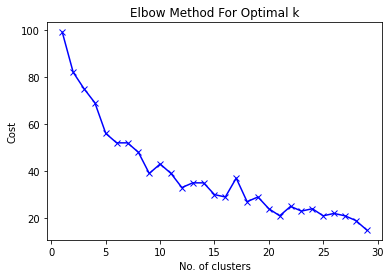

In [10]:
cost = []
K = range(1,30)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(movie_df.iloc[:,6:])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [11]:
kmode = KModes(n_clusters=13, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(movie_df.iloc[:,6:])
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 40.0
Run 1, iteration: 2/100, moves: 0, cost: 40.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 9, cost: 54.0
Run 2, iteration: 2/100, moves: 0, cost: 54.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 5, cost: 37.0
Run 3, iteration: 2/100, moves: 0, cost: 37.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 18, cost: 33.0
Run 4, iteration: 2/100, moves: 0, cost: 33.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 2, cost: 46.0
Best run was number 4


array([ 3,  8,  8,  8,  0,  9,  3,  2, 12,  3, 12,  8,  3, 10, 10,  8, 11,
        3,  1, 12, 11, 12, 10,  9,  7,  7,  0,  1, 11, 12,  8,  6,  7, 12,
       12,  8,  3, 12, 12, 12, 10, 12,  6,  1,  1,  6, 12,  0,  0, 11, 11,
        1, 12,  6,  0], dtype=uint16)

In [12]:
movie_df.insert(0, "Cluster", clusters, True)

In [13]:
filter = movie_df["Cluster"] == 2
movie_df[filter]

,Cluster,Movie,Genre,Rating,MPAA rating,Runtime,Description,Action,Adventure,Fantasy,...,Horror,Thriller,Sci-Fi,Biography,Music,Romance,Mystery,Documentary,Western,Musical
7,2,Guillermo del Toro's Pinocchio,"Animation, Drama, Family",7.7,PG,117 min,A father's wish magically brings a wooden boy ...,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## TESTING OUT NEW method for cleaning data

In [ ]:
import pandas as pd

# create a Series where each row is a list of genres
s = pd.Series([['action', 'adventure'], ['comedy'], ['action', 'comedy', 'drama']])

s.explode()
#set(s.apply(lambda x: [genre for genre in x]).sum())
# extract all of the genres from the lists and get the unique values
# unique_genres = set(s.apply(lambda x: [genre for genre in x]).sum())
# print(unique_genres)


0       action
0    adventure
1       comedy
2       action
2       comedy
2        drama
dtype: object

In [ ]:
gen = movie_df.Genre.apply(lambda x : x.split(","))
gen

0     [Action,  Adventure,  Fantasy]
1         [Comedy,  Drama,  History]
2          [Action,  Comedy,  Crime]
3                   [Comedy,  Drama]
4     [Action,  Adventure,  Fantasy]
                   ...              
58                [Comedy,  Romance]
59                           [Drama]
60                     [Documentary]
61             [Documentary,  Short]
62                     [Documentary]
Name: Genre, Length: 63, dtype: object

In [ ]:
gen.apply(lambda x: [genre for genre in x])

0     [Action,  Adventure,  Fantasy]
1         [Comedy,  Drama,  History]
2          [Action,  Comedy,  Crime]
3                   [Comedy,  Drama]
4     [Action,  Adventure,  Fantasy]
                   ...              
58                [Comedy,  Romance]
59                           [Drama]
60                     [Documentary]
61             [Documentary,  Short]
62                     [Documentary]
Name: Genre, Length: 63, dtype: object

In [ ]:
unique_genres1 = list(set(gen.sum()))

In [ ]:
unique_2 = list(map(lambda x: x.strip(),unique_genres1))


In [ ]:
c_movie = movie_df.copy()



In [ ]:
list(map(lambda y : y.strip(),c_movie['Genre'][0]))

['Action', 'Adventure', 'Fantasy']

In [ ]:
c_movie['Genre']= movie_df.Genre.apply(lambda x : x.split(","))
c_movie['Genre'] =c_movie['Genre'].apply(lambda x : list(map(lambda y: y.strip(),x)))


In [ ]:
c_movie['Genre'][0]

['Action', 'Adventure', 'Fantasy']

In [ ]:
x = pd.get_dummies(c_movie['Genre'].explode())
dummies_table = x.groupby(x.index).sum()

In [ ]:
dummies_table

,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,Family,Fantasy,Film-Noir,History,Horror,Music,Mystery,Romance,Sci-Fi,Short,Thriller,War
0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0
2,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
59,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
60,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
61,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0


In [ ]:
full_df= pd.concat([c_movie,dummies_table],axis =1)

In [ ]:
full_df

,Movie,Genre,Rating,MPAA rating,Runtime,Description,Action,Adventure,Animation,Biography,...,Film-Noir,History,Horror,Music,Mystery,Romance,Sci-Fi,Short,Thriller,War
0,Avatar: The Way of Water,"[Action, Adventure, Fantasy]",7.9,PG-13,192 min,Jake Sully lives with his newfound family form...,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Babylon,"[Comedy, Drama, History]",7.4,R,189 min,A tale of outsized ambition and outrageous exc...,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,Violent Night,"[Action, Comedy, Crime]",6.8,R,112 min,When a group of mercenaries attack the estate ...,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,The Banshees of Inisherin,"[Comedy, Drama]",7.9,R,114 min,Two lifelong friends find themselves at an imp...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Black Adam,"[Action, Adventure, Fantasy]",6.5,PG-13,125 min,"Nearly 5,000 years after he was bestowed with ...",1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58,Labyu with an Accent,"[Comedy, Romance]",5.6,N/A,119 min,Gabo and Trisha come from different background...,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
59,Sembi,[Drama],9.1,N/A,140 min,A bus named Anbu narrates the stories of its 2...,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
60,A Star Without a Star: The Untold Juanita Moor...,[Documentary],N/A,N/A,90 min,Add a Plot,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
61,Beavers,"[Documentary, Short]",7.8,Not Rated,31 min,Several beaver families in their wild surround...,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 128.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 128.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 3, cost: 106.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 4, cost: 110.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, it

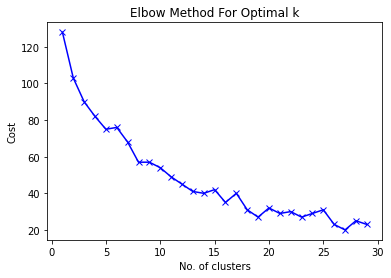

In [ ]:
cost = []
K = range(1,30)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(full_df.iloc[:,6:])
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

In [ ]:
kmode = KModes(n_clusters=13, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(full_df.iloc[:,6:])
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 47.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 6, cost: 45.0
Run 2, iteration: 2/100, moves: 0, cost: 45.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 12, cost: 51.0
Run 3, iteration: 2/100, moves: 1, cost: 51.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 5, cost: 48.0
Run 4, iteration: 2/100, moves: 1, cost: 48.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 25, cost: 46.0
Run 5, iteration: 2/100, moves: 3, cost: 46.0
Best run was number 2


array([ 6,  9, 10,  9,  6,  2,  7,  7,  7,  8, 10,  9,  4,  6,  0,  0,  7,
        7,  7,  7,  9,  9,  3,  1,  7,  4,  7,  3,  7,  7,  0,  9,  7,  4,
        0,  3,  4,  4,  7,  5,  0,  4,  5,  1,  0,  3,  7,  4,  7, 10,  4,
        3, 12,  9,  5,  8,  4,  4,  8,  7,  5,  5,  5], dtype=uint16)

In [ ]:
full_df.insert(0, "Cluster", clusters, True)

In [ ]:
filter = full_df["Cluster"] == 4
full_df[filter]

,Cluster,Movie,Genre,Rating,MPAA rating,Runtime,Description,Action,Adventure,Animation,...,Film-Noir,History,Horror,Music,Mystery,Romance,Sci-Fi,Short,Thriller,War
12,4,Bones and All,"[Drama, Horror, Romance]",7.0,R,131 min,"Maren, a young woman, learns how to survive on...",0,0,0,...,0,0,1,0,0,1,0,0,0,0
25,4,Empire of Light,"[Drama, Romance]",6.6,R,115 min,A drama about the power of human connection du...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
33,4,Casablanca,"[Drama, Romance, War]",8.5,PG,102 min,A cynical expatriate American cafe owner strug...,0,0,0,...,0,0,0,0,0,1,0,0,0,1
36,4,When Harry Met Sally...,"[Comedy, Drama, Romance]",7.7,R,95 min,Harry and Sally have known each other for year...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
37,4,Phantom Thread,"[Drama, Romance]",7.4,R,130 min,"Set in 1950s London, Reynolds Woodcock is a re...",0,0,0,...,0,0,0,0,0,1,0,0,0,0
41,4,Vertigo,"[Mystery, Romance, Thriller]",8.3,PG,128 min,A former San Francisco police detective juggle...,0,0,0,...,0,0,0,0,1,1,0,0,1,0
47,4,18 Pages,[Romance],8.0,N/A,135 min,"Nandini, a young woman who suffers from short-...",0,0,0,...,0,0,0,0,0,1,0,0,0,0
50,4,Millennium Mambo,"[Drama, Romance]",7.0,R,119 min,The ethereally beautiful Vicky recalls her rom...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
56,4,Vive L'Amour,"[Drama, Romance]",7.4,R,118 min,Three lonely young denizens of Taipei unknowin...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
57,4,The Wounded Man,"[Crime, Drama, Romance]",6.7,N/A,109 min,A young man discovers his homosexuality and be...,0,0,0,...,0,0,0,0,0,1,0,0,0,0
